<h1 align="center">Credit Scoring Model</h1>

# Introduction


Data and Features:

Datasets:

The dataset comprises various fields, each providing valuable insights into sales patterns. Key features include:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno
import os, sys

import logging

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get the absolute path to the parent directory
parent_dir = os.path.dirname(os.getcwd())

# Add the parent directory to sys.path
sys.path.append(parent_dir)

from src import handler, visualizer

In [3]:
# Initialize the logger
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Data Gathering

In [4]:
def load_data(path):
    try:
        df = pd.read_csv(path, low_memory=False)
        return df
    except Exception as e:
        logger.info(f"Error on Loding Data {e}")

In [5]:
url = "../data/data.csv"
credit_df = load_data(url)

In [6]:
credit_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# Data Overview

In [7]:
# create handler object
handler_df1 = handler.Handler(credit_df)

In [8]:
# Data overview of train_df
handler_df1.data_overview()

Number of rows: 95662
Number of columns: 16

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  Pricin

# Data Cleaning
- Handling missing values
- Handling duplicate values
- Handling outliers 

## 1. Handling Missing Values
Handling missing values is another important step in data cleaning. Missing values can be represented as NaN (Not a Number) or empty strings. I use the `isnull()` function to identify missing values and the `dropna()` function to remove rows with missing values.

In [11]:
# check missing values credit_df
handler_df1.calculate_missing_percentage()

                      Missing Values Percentage Missing
TransactionId                      0              0.00%
BatchId                            0              0.00%
AccountId                          0              0.00%
SubscriptionId                     0              0.00%
CustomerId                         0              0.00%
CurrencyCode                       0              0.00%
CountryCode                        0              0.00%
ProviderId                         0              0.00%
ProductId                          0              0.00%
ProductCategory                    0              0.00%
ChannelId                          0              0.00%
Amount                             0              0.00%
Value                              0              0.00%
TransactionStartTime               0              0.00%
PricingStrategy                    0              0.00%
FraudResult                        0              0.00%


<Axes: >

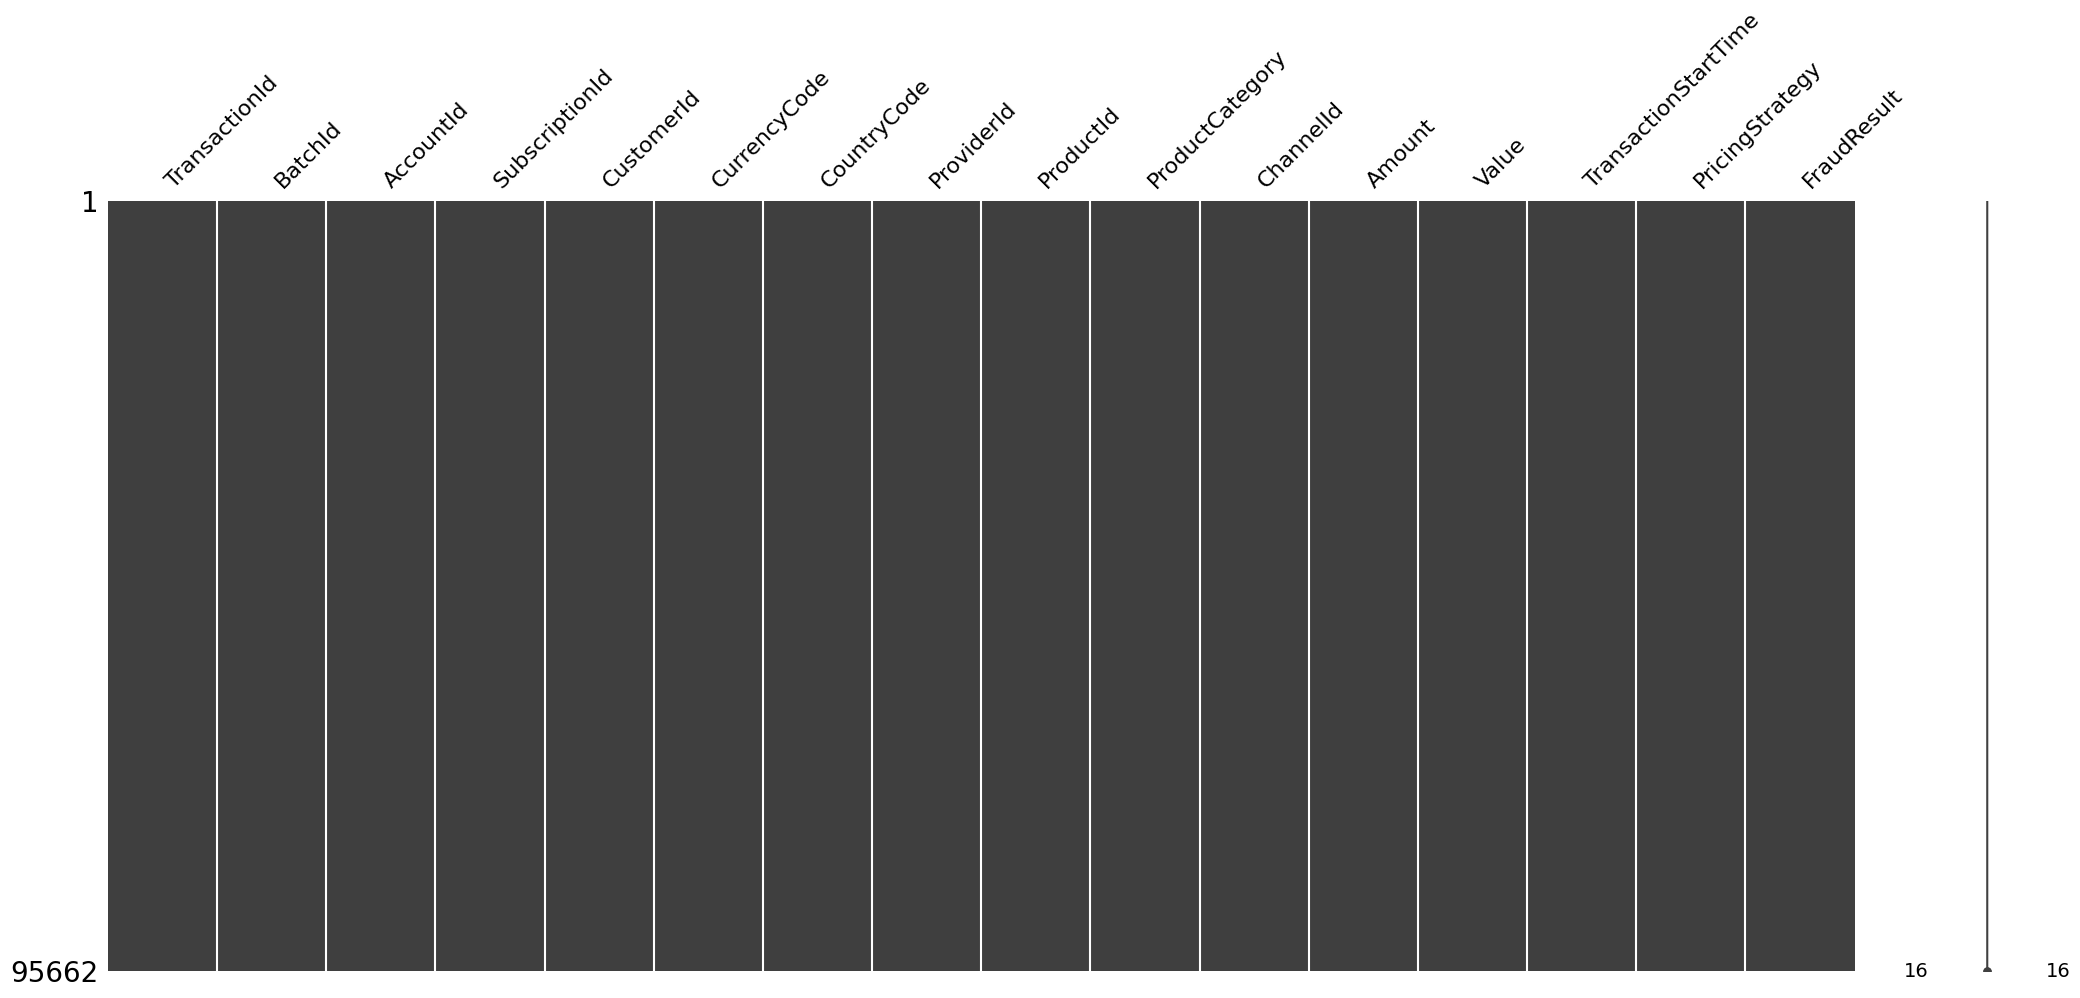

In [10]:
# visualize missing values
missingno.matrix(credit_df)

## 2. Handling Duplicate Values
Handling duplicate values involves identifying and removing duplicate rows from the DataFrame. I use the `duplicated()` function to identify duplicate rows and the `drop_duplicates()` function to remove them.

In [13]:
#check duplicate values for credit_df
handler_df1.check_duplicate()


Duplicated values:
0 duplicated rows


## 3. Handling outliers
Handling outliers is a crucial step in data cleaning and preprocessing. Here are the key steps to handle outliers effectively:
#### Identifying Outliers
The first step is to identify the presence of outliers in my dataset. I Use box plots.

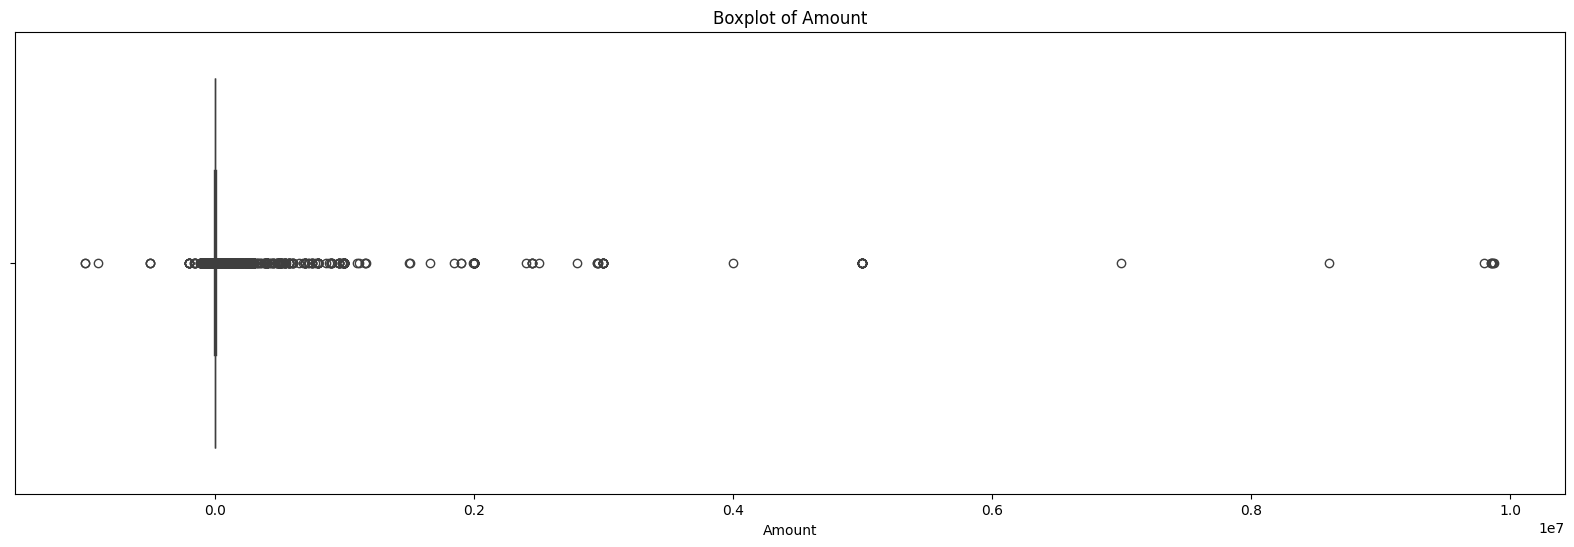

In [14]:
visualizer.plot_boxplot(credit_df, "Amount")

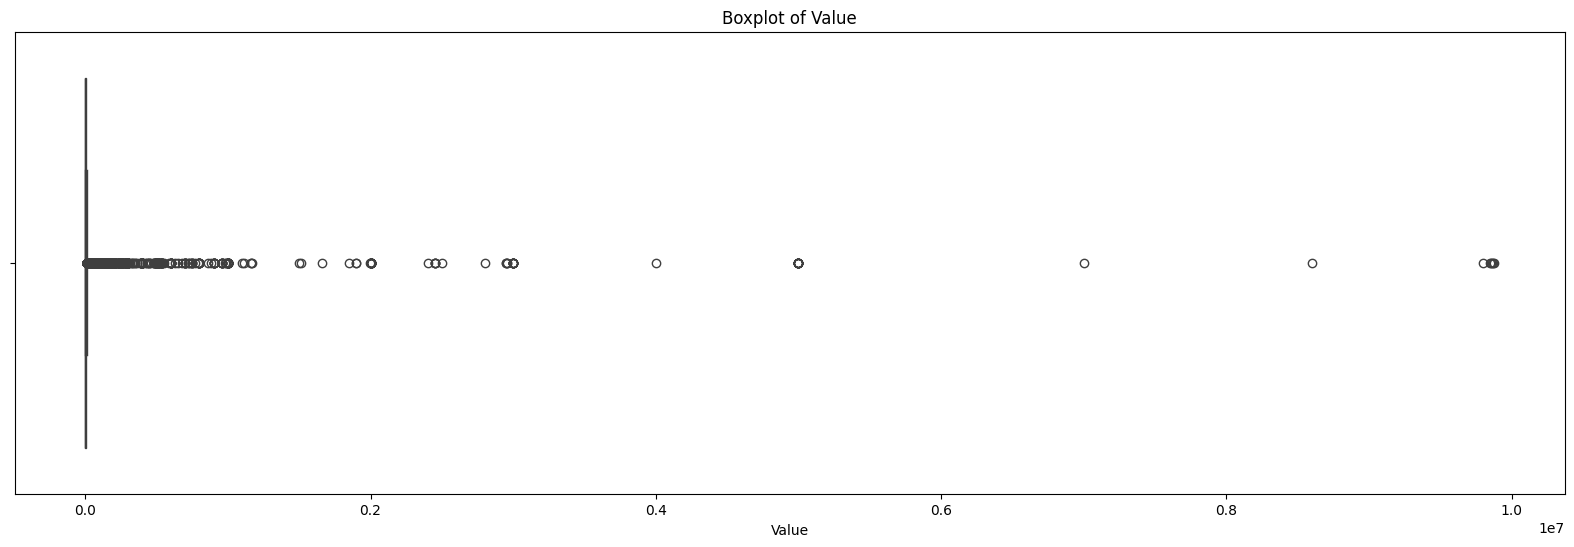

In [15]:
visualizer.plot_boxplot(credit_df, "Value")

The whisker of the above box plots shows that there is an outlier in the columns.

#### Removing the outliers

In [16]:
credit_df=handler_df1.remove_iqr_outliers("Amount")

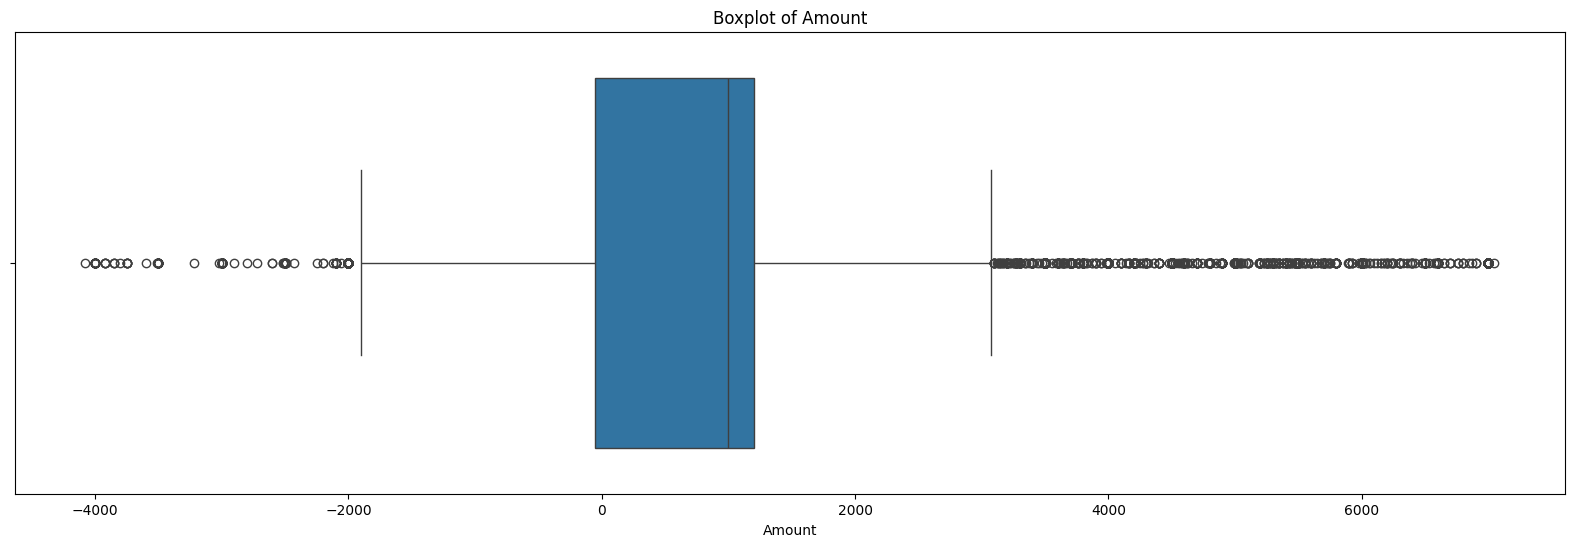

In [17]:
visualizer.plot_boxplot(credit_df, "Amount")

In [18]:
credit_df = handler_df1.remove_iqr_outliers("Value")

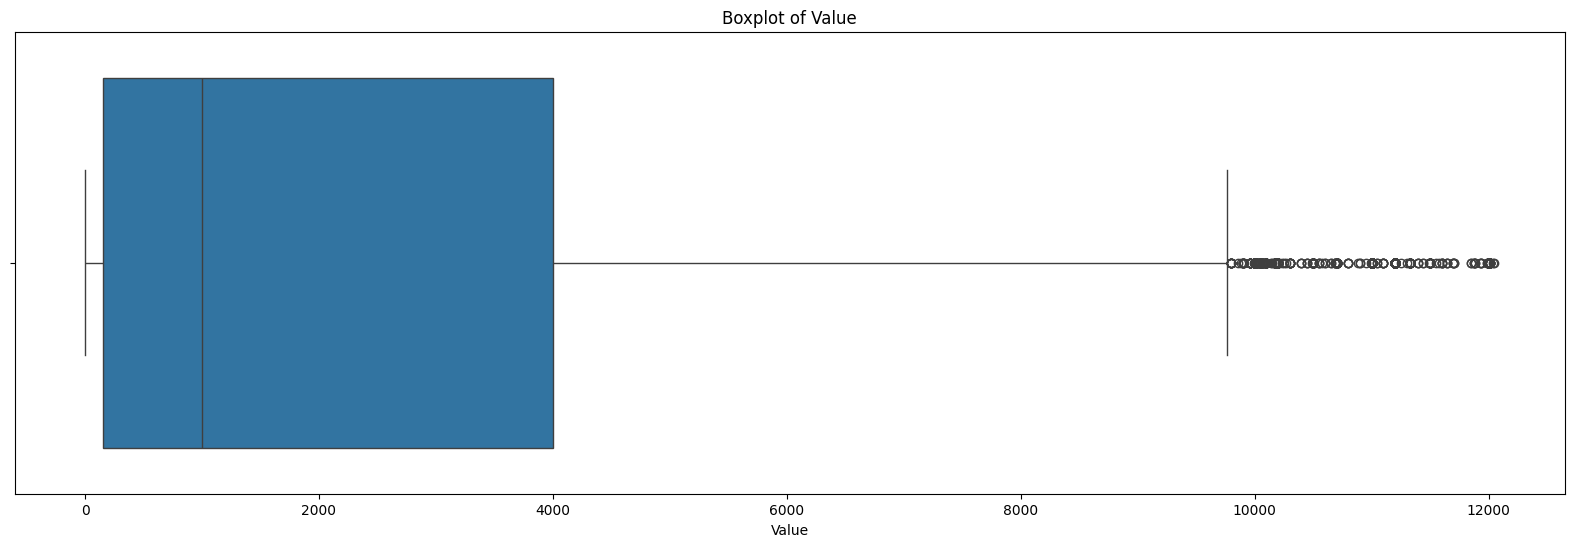

In [19]:
visualizer.plot_boxplot(credit_df, "Value")

# Feature selection and Feature Engineering

In [11]:
credit_df = handler_df1.create_date_features("TransactionStartTime")
credit_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Value,TransactionStartTime,PricingStrategy,FraudResult,Day,Month,Year,Hour,Minute,Second
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000,2018-11-15 02:18:49+00:00,2,0,15,11,2018,2,18,49
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,20,2018-11-15 02:19:08+00:00,2,0,15,11,2018,2,19,8
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500,2018-11-15 02:44:21+00:00,2,0,15,11,2018,2,44,21
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,21800,2018-11-15 03:32:55+00:00,2,0,15,11,2018,3,32,55
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,644,2018-11-15 03:34:21+00:00,2,0,15,11,2018,3,34,21


In [12]:
credit_df.nunique()

TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
CountryCode                 1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1676
Value                    1517
TransactionStartTime    94556
PricingStrategy             4
FraudResult                 2
Day                        31
Month                       4
Year                        2
Hour                       24
Minute                     60
Second                     60
dtype: int64

# Storing the Data

In [14]:
credit_df.to_csv("../data/credit_clean.csv")

In [5]:
url = "../data/credit_clean.csv"
credit_df = load_data(url)

# Descriptive Statistics

In [6]:
num_col, cat_col = credit_df.select_dtypes(exclude=['object']), credit_df.select_dtypes(include=["object"])

In [16]:
# stats for numric type
num_col.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Day,Month,Year,Hour,Minute,Second
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018,15.902898,6.566233,2018.497115,12.447722,29.483578,29.549267
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872,8.962822,5.224310,0.499994,4.846964,17.289683,17.311836
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000,8.000000,1.000000,2018.000000,8.000000,15.000000,15.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000,16.000000,11.000000,2018.000000,13.000000,29.000000,29.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000,24.000000,12.000000,2019.000000,17.000000,45.000000,45.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000,31.000000,12.000000,2019.000000,23.000000,59.000000,59.000000


In [17]:
#stats for Categorical column
cat_col.describe()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935


# Data Visualisation
Data visualization is a crucial aspect of data analysis, as it helps to effectively communicate insights and patterns in the data. Here's a brief overview of how data visualization can be applied in univariate, bivariate, and multivariate analysis.

## Univariate analysis
In univariate analysis, where only one variable is considered at a time. These visualizations help to understand the central tendency, spread, and shape of the distribution of a single variable.


### Distribution of Numerical Features

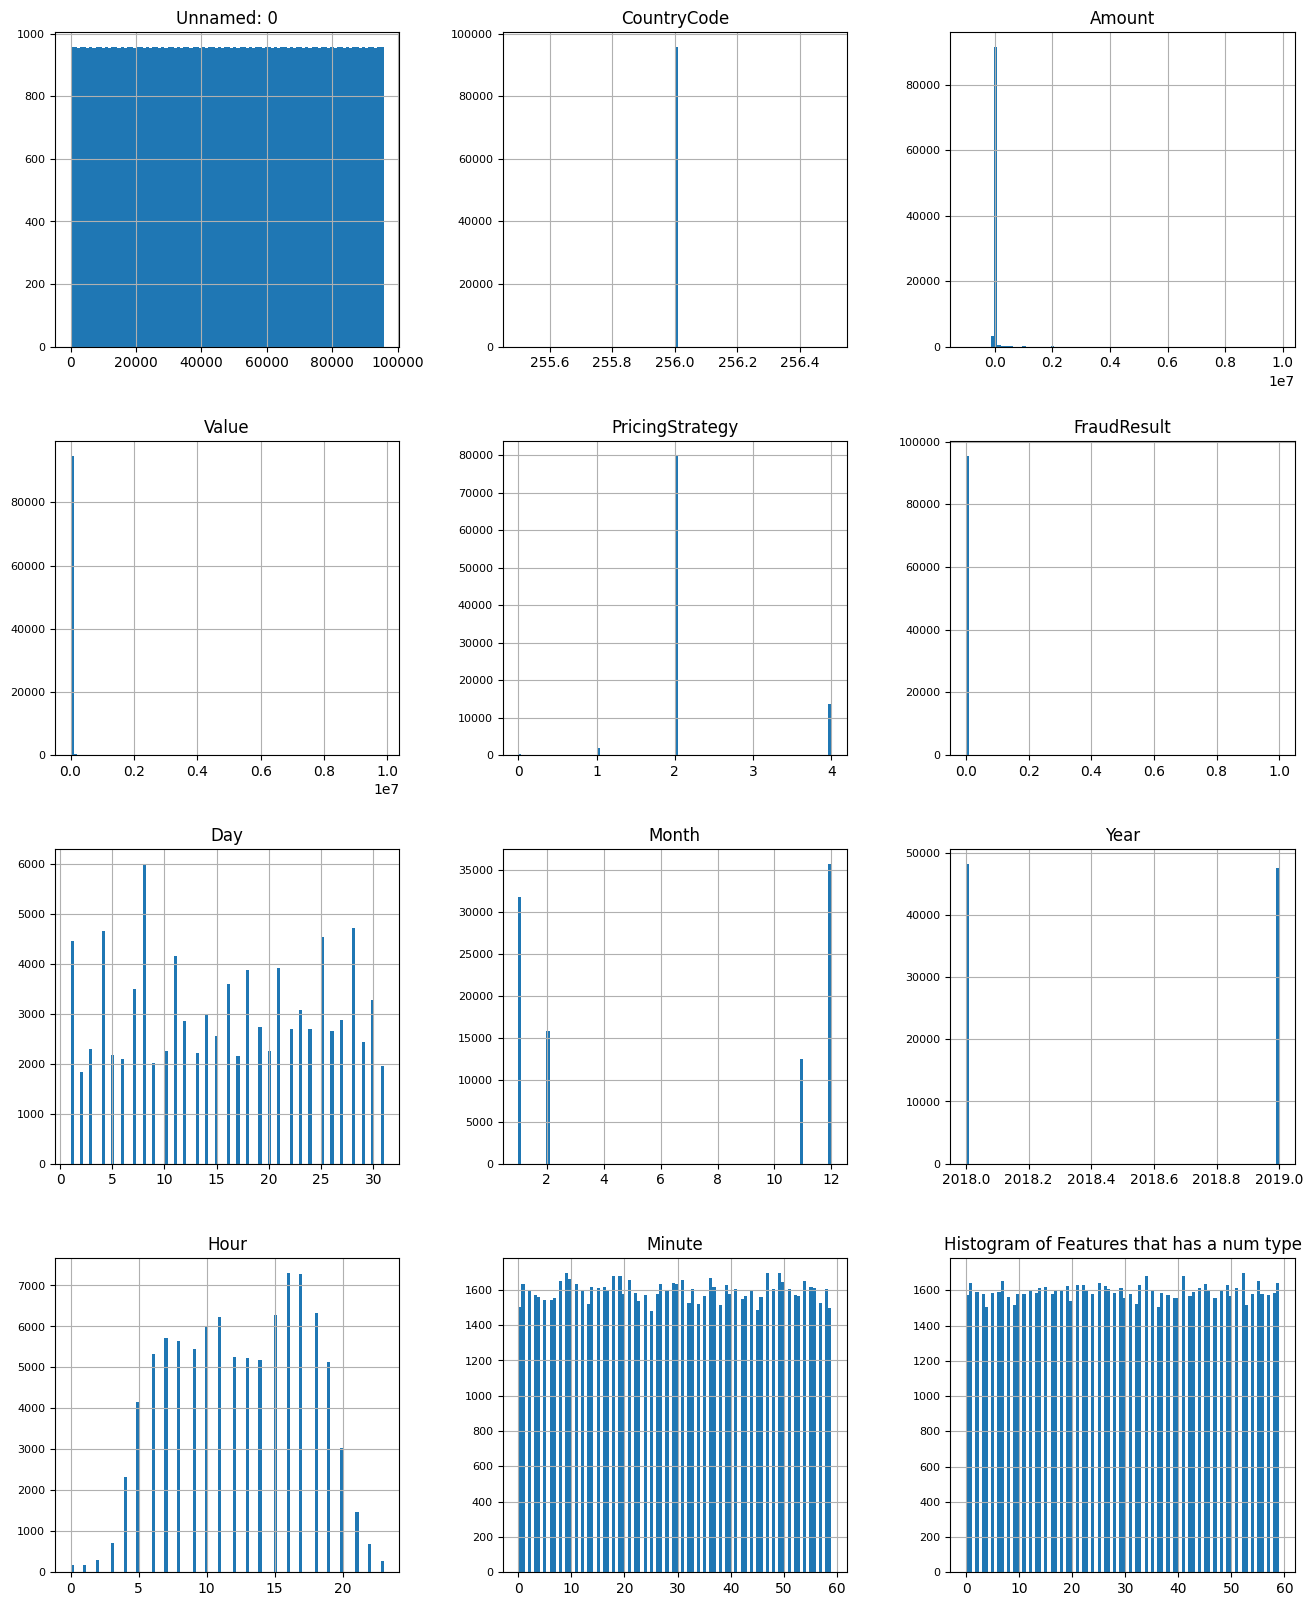

In [8]:
# Plotting histograms
num_col.hist(figsize=(16, 20), bins=100, ylabelsize=8)
plt.title("Histogram of Features that has a num type")
plt.show()

### Distribution of Categorical Features

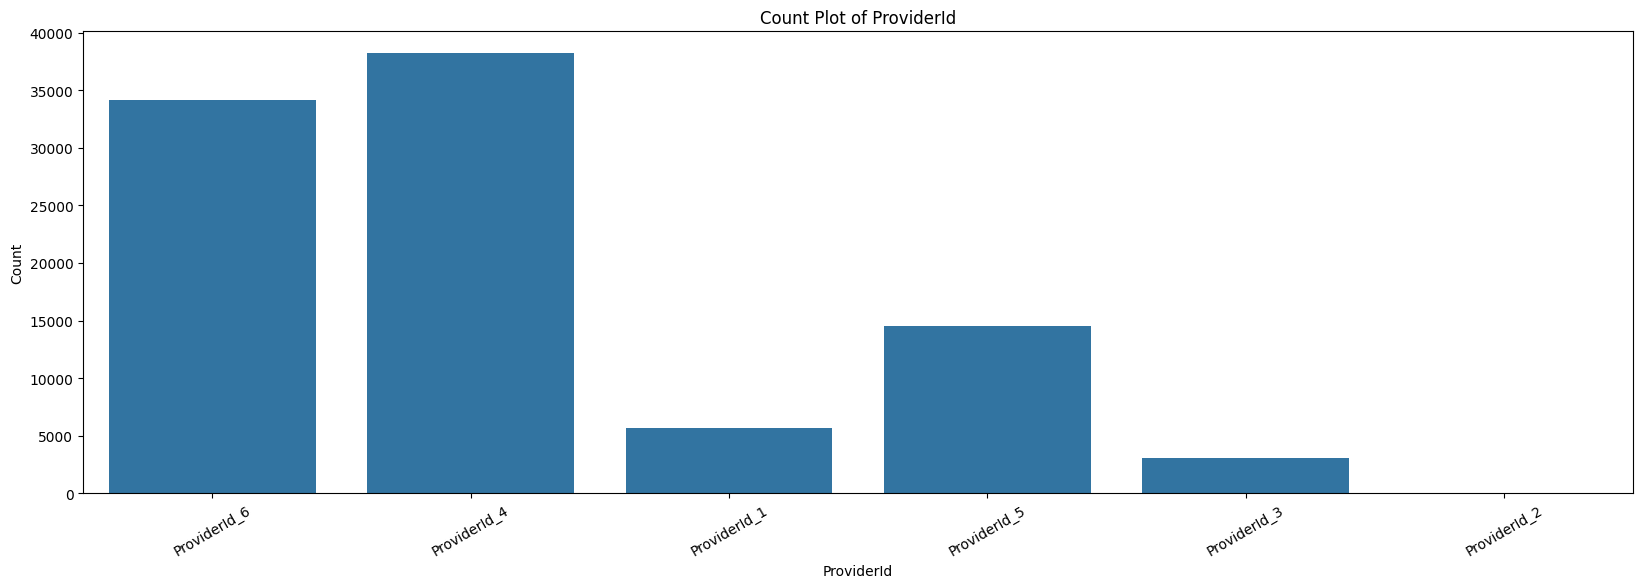

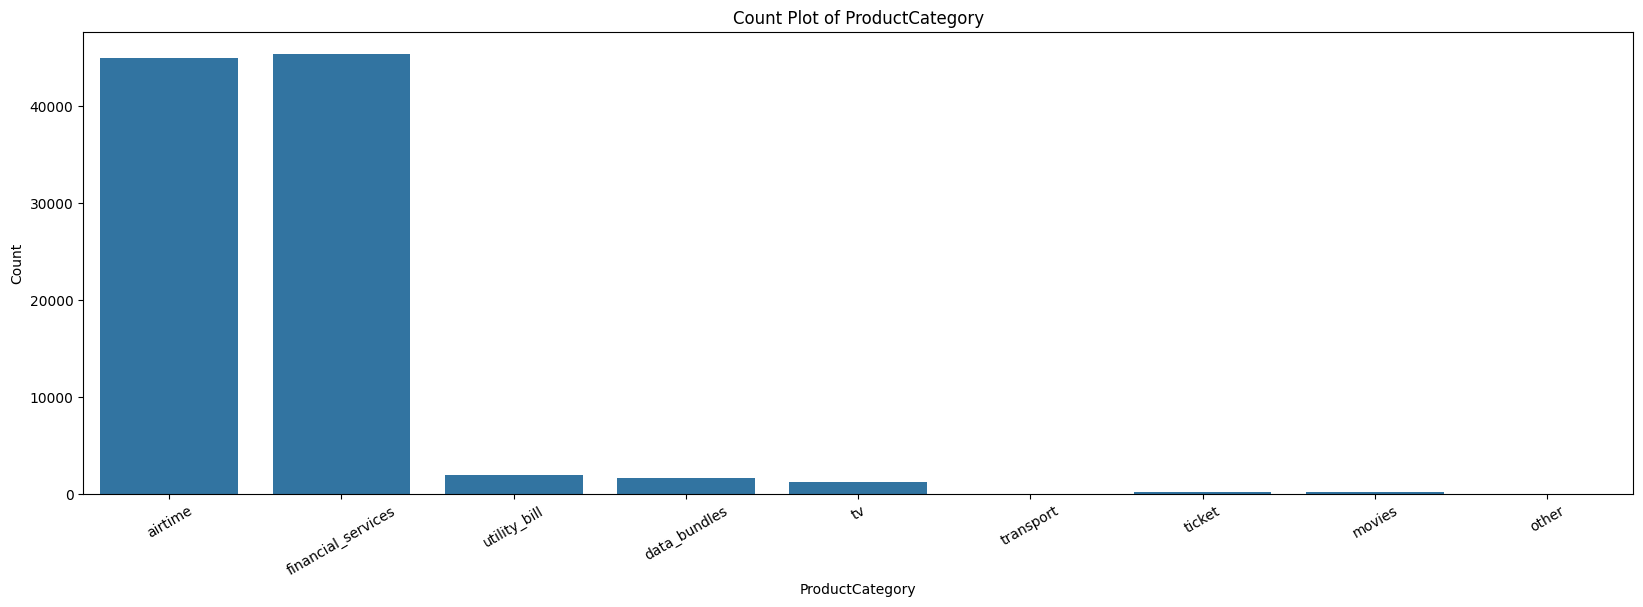

2024-06-09 11:22:36,277 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-09 11:22:36,367 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


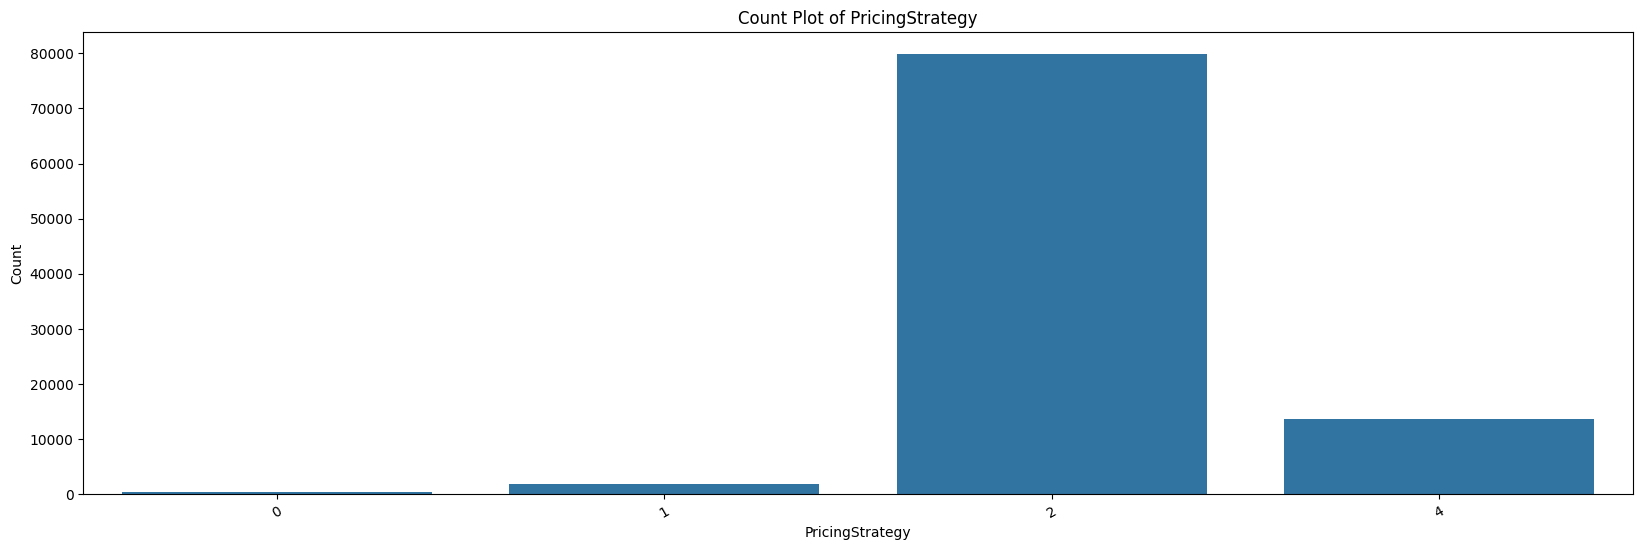

2024-06-09 11:22:36,721 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-09 11:22:36,812 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


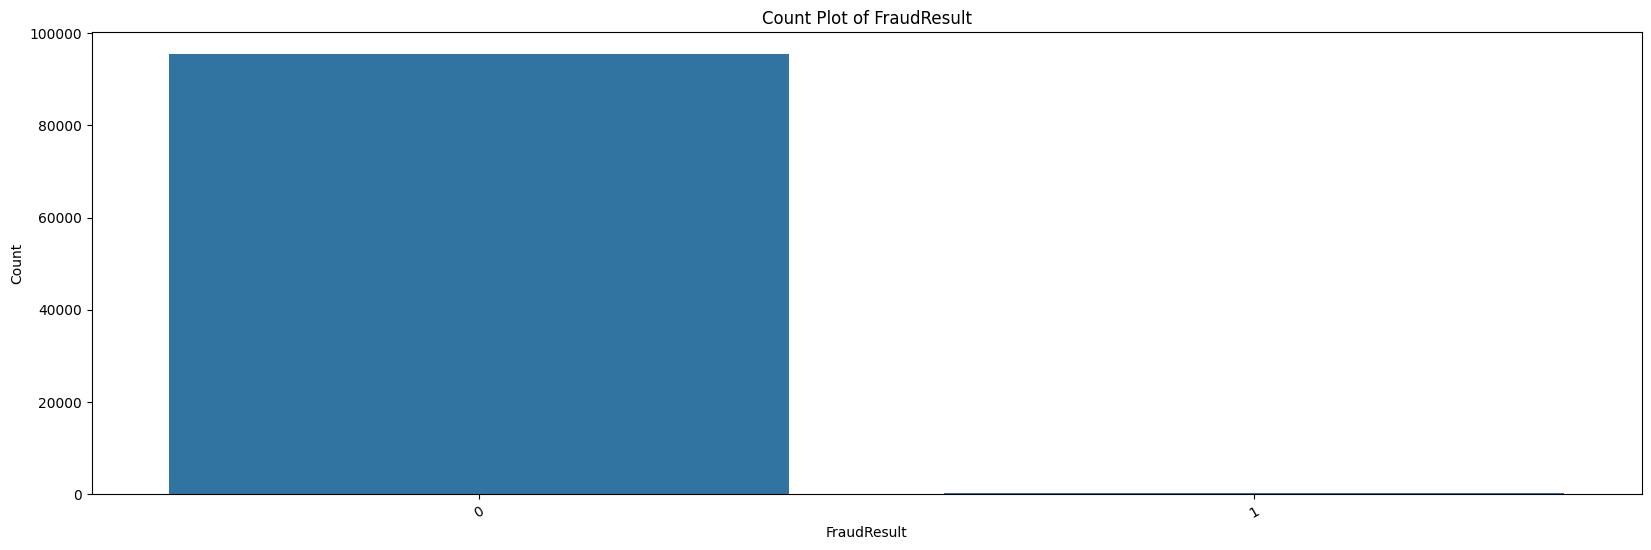

2024-06-09 11:22:37,133 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-09 11:22:37,220 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


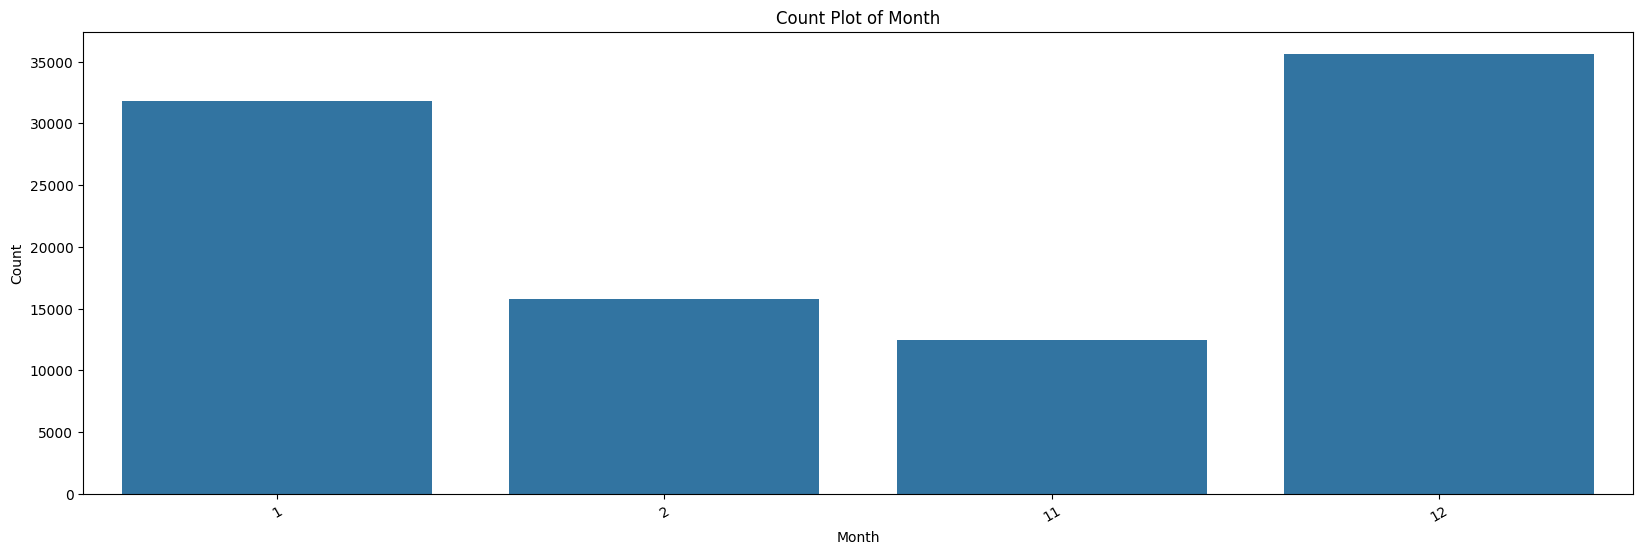

2024-06-09 11:22:37,562 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-09 11:22:37,629 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


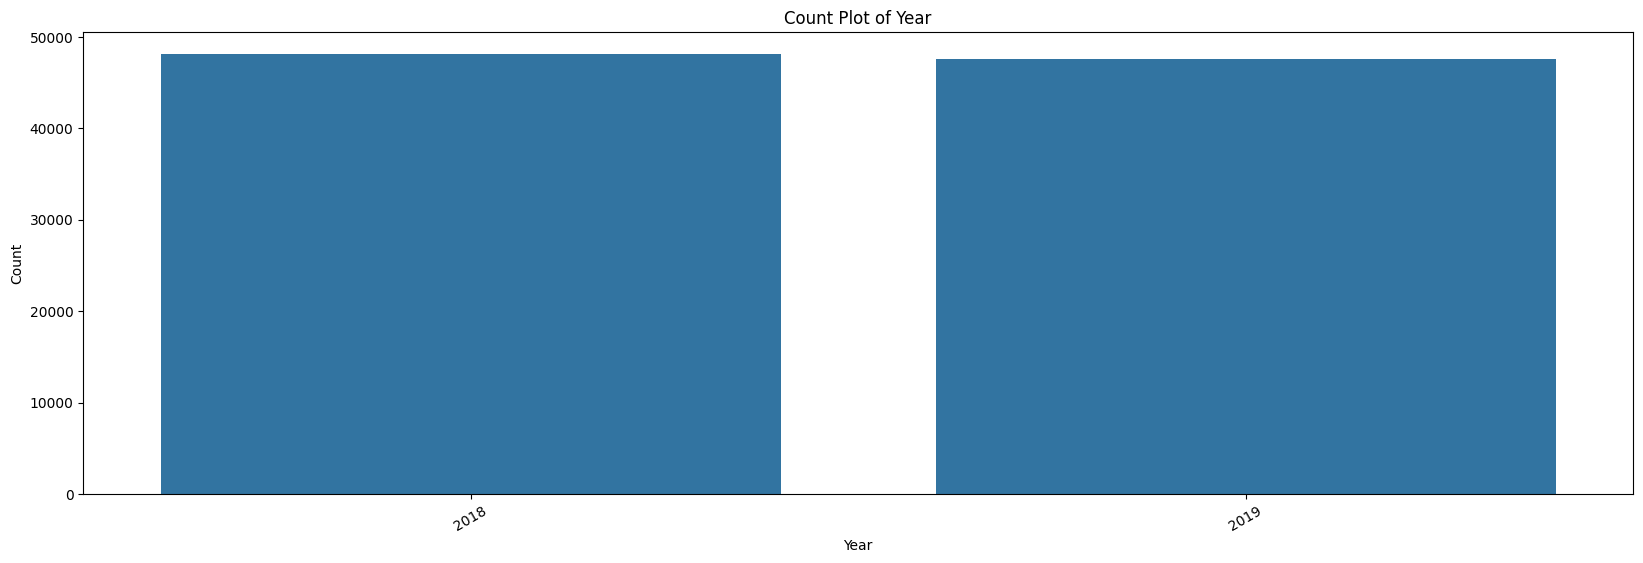

In [7]:
cols = ['ProviderId', 'ProductCategory', 'PricingStrategy', 'FraudResult', 'Month', 'Year']
for col in cols:
    visualizer.plot_count(credit_df, col)

## Bivariate analysis and Multivariate analysis

Multivariate analysis involves the study of three or more variables simultaneously. Visualizations for multivariate data can be more complex.

Bivariate analysis examines the relationship between two variables.


In [8]:
# bar plot
def plot_bar(df, col1, col2, hue=None, xtricks=None):
    plt.figure(figsize=(20, 10))
    if hue == None:
        sns.barplot(data=df, x=col1, y=col2)
    else:
        sns.barplot(data=df, x=col1, y=col2, hue=hue)
    plt.xlabel(col1, fontsize=15)
    plt.ylabel(col2, fontsize=15)
    plt.title(f"Comparision between {col1} and {col2}", fontsize=15)
    if xtricks != None:
        plt.xticks(df[col1].unique(), xtricks, rotation=90)
    plt.xticks(rotation=90)
    plt.show()

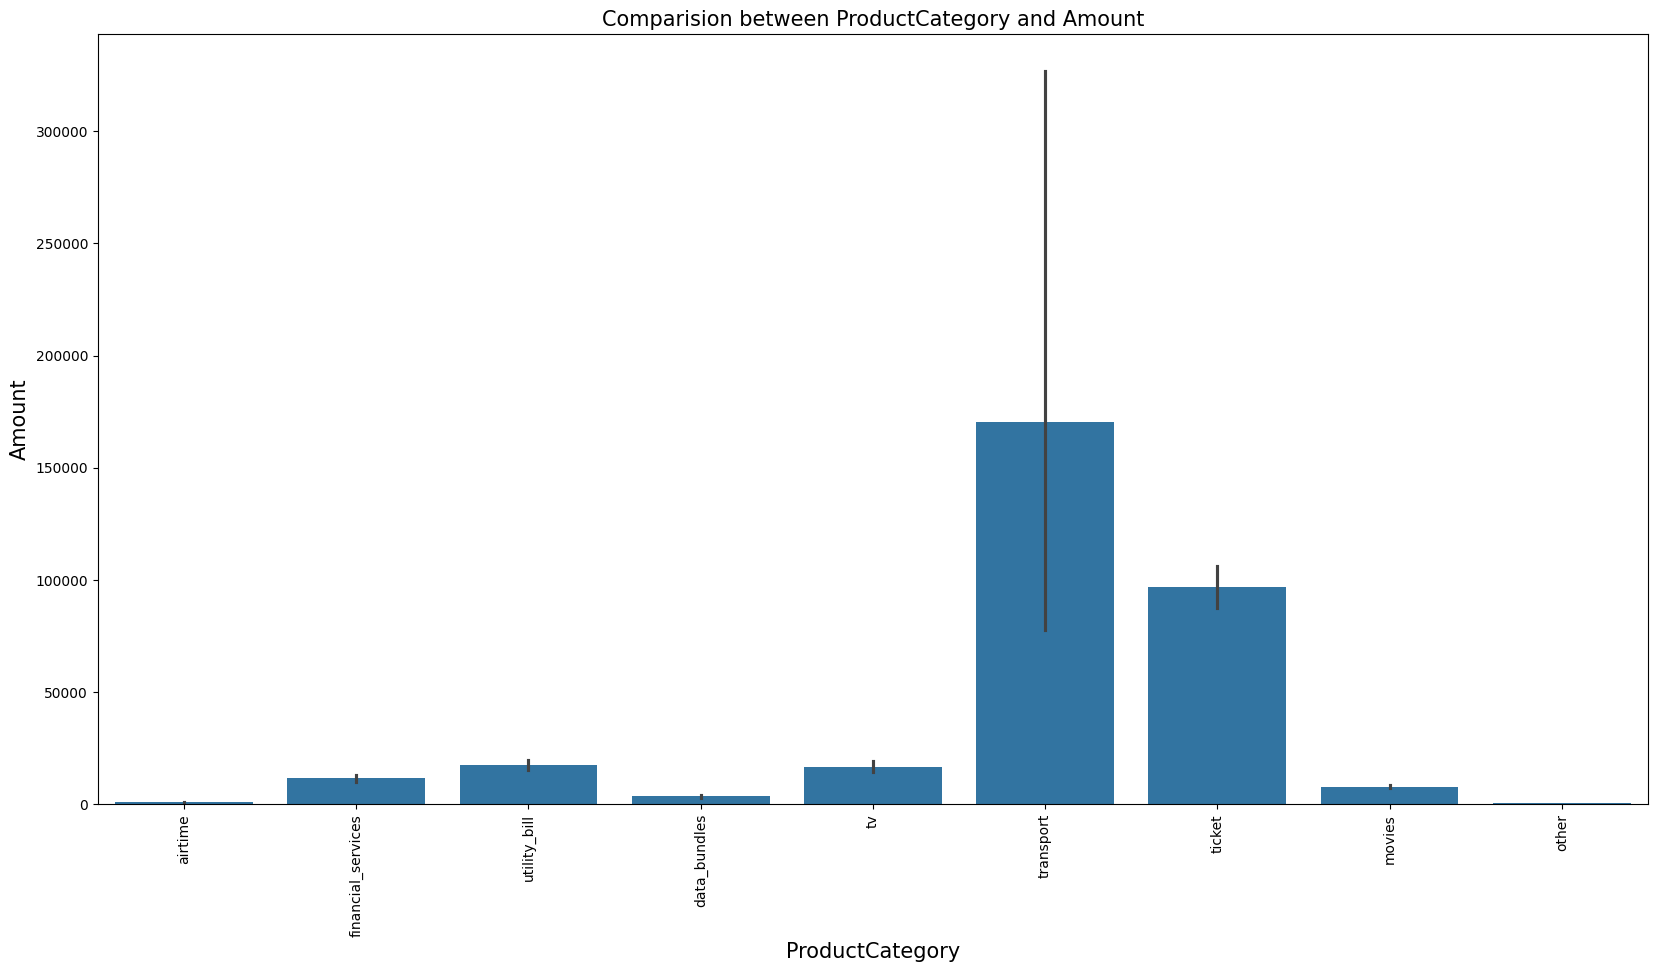

In [9]:

plot_bar(credit_df, 'ProductCategory', "Amount")

The plot shows, transport and ticket has higher amounts.

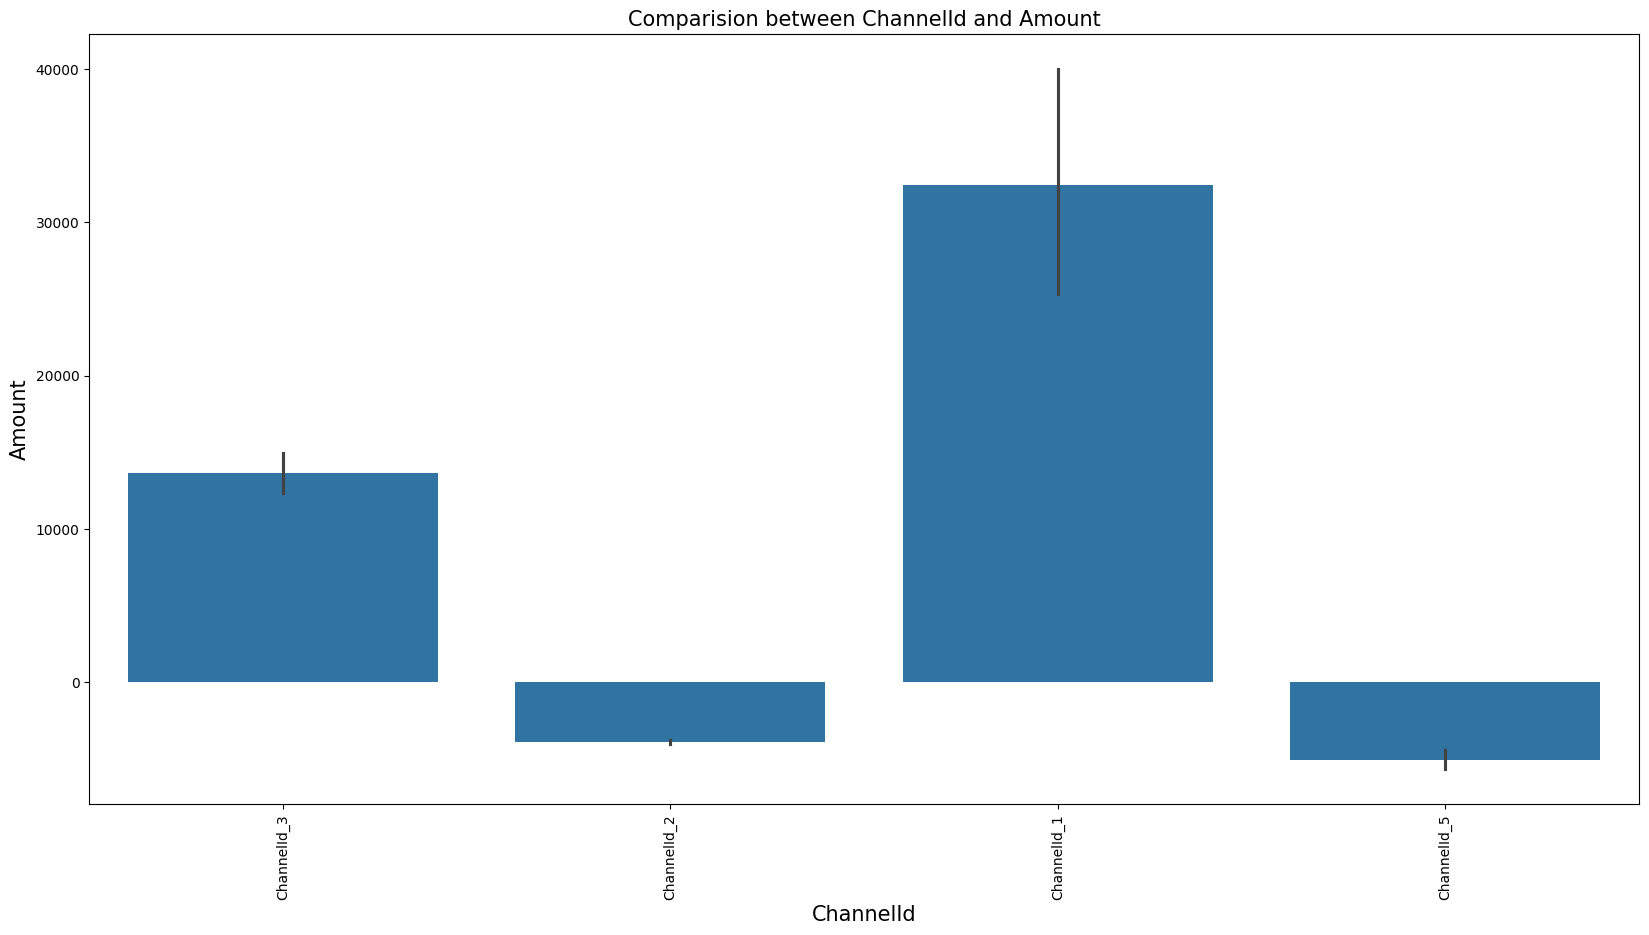

In [27]:
plot_bar(credit_df, 'ChannelId', 'Amount')

The plot shows, channelId_3 and ChannelId_1 has a posetive amount. Whereas, ChannelId_2 and ChannelId_5 has a negative amount.

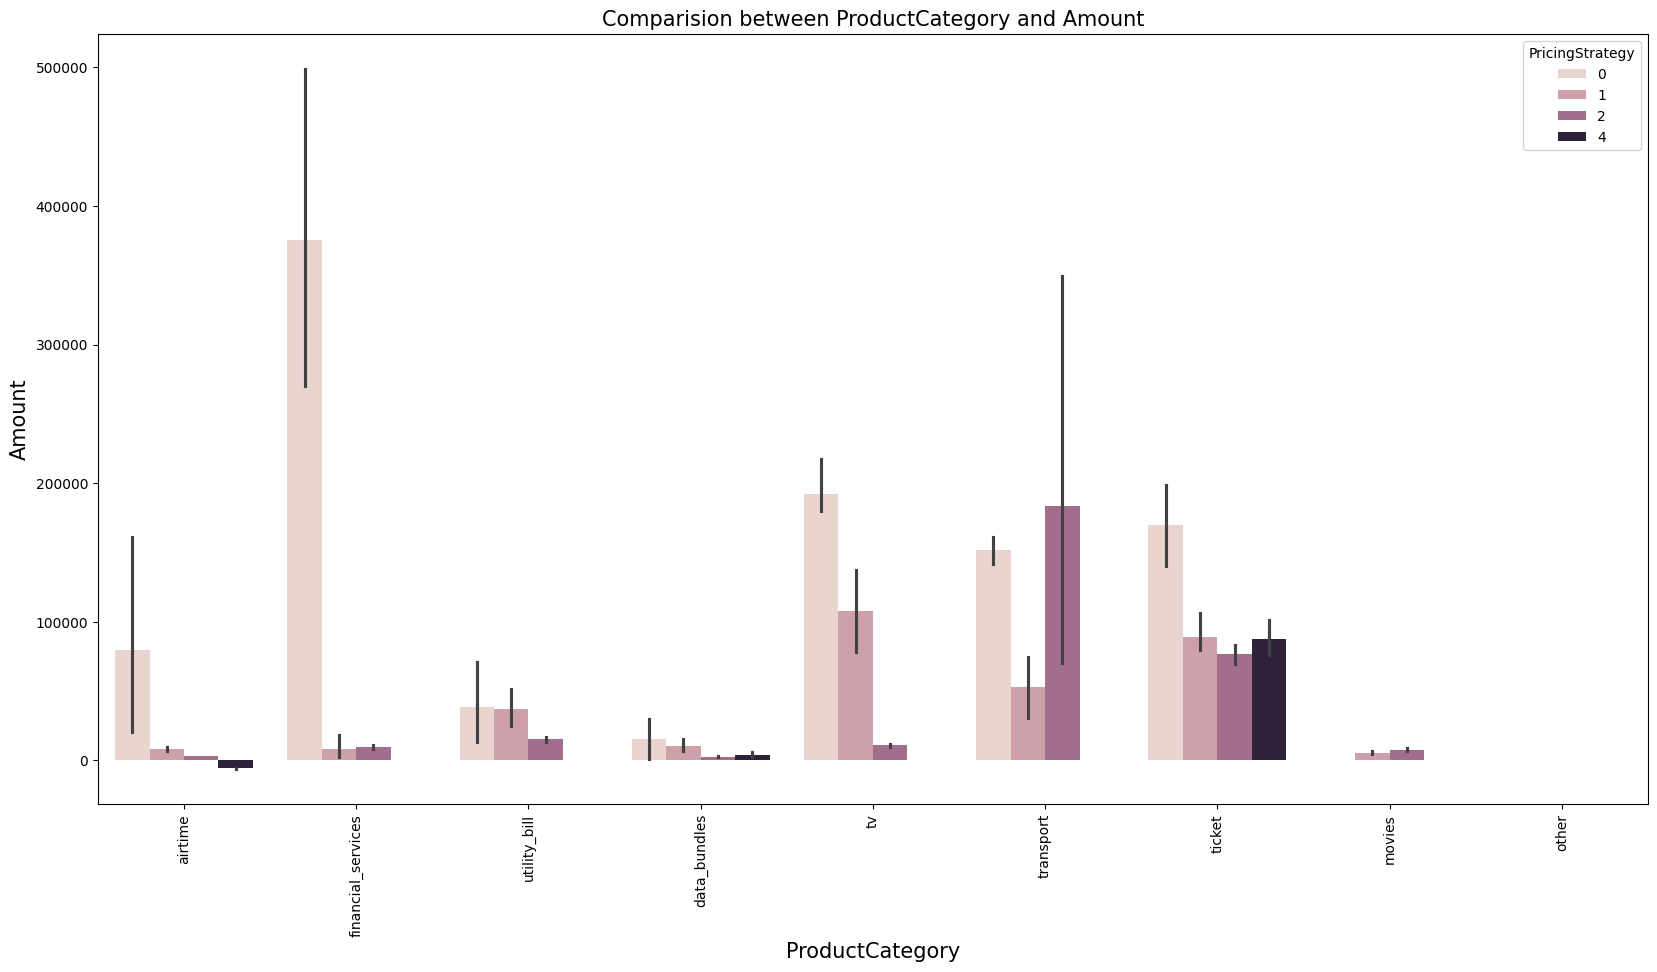

In [12]:
plot_bar(credit_df, 'ProductCategory', 'Amount', hue='PricingStrategy')

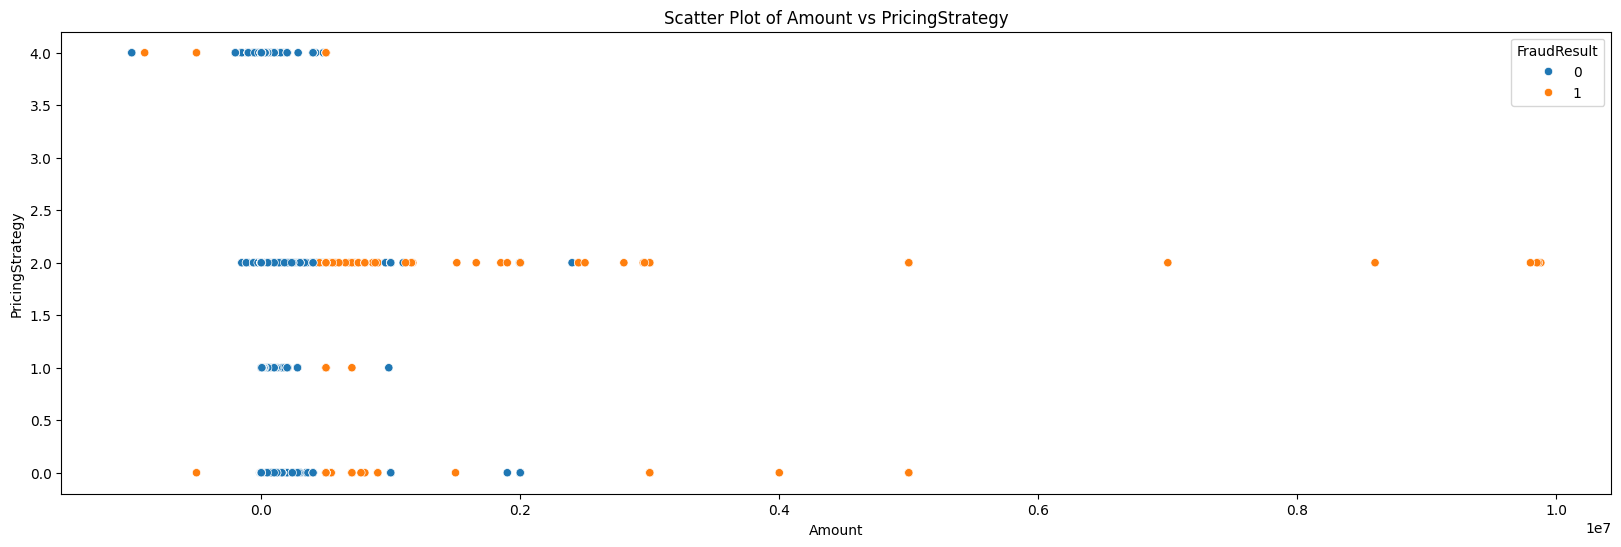

In [28]:
visualizer.plot_scatter(credit_df,  "Amount", 'PricingStrategy', hue_col="FraudResult")

2024-06-09 11:42:49,964 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-09 11:42:50,077 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


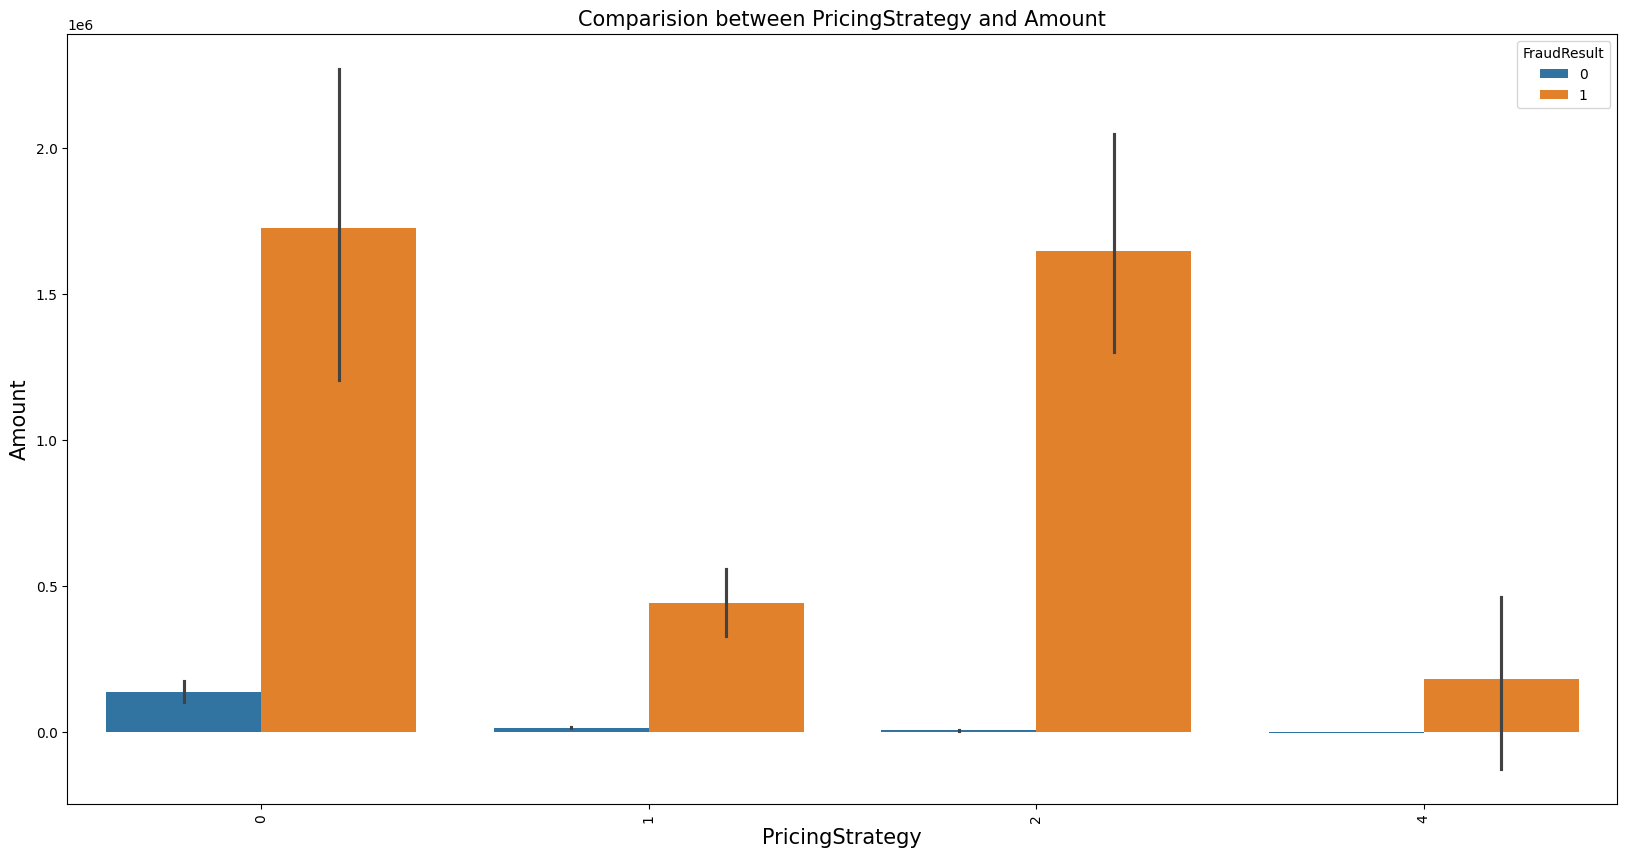

In [16]:
plot_bar(credit_df, 'PricingStrategy', 'Amount', hue='FraudResult')

#### Trends over different Times.

In [29]:
selected_features = ['Day',	'Month', 'Hour', "Minute", "Second"]

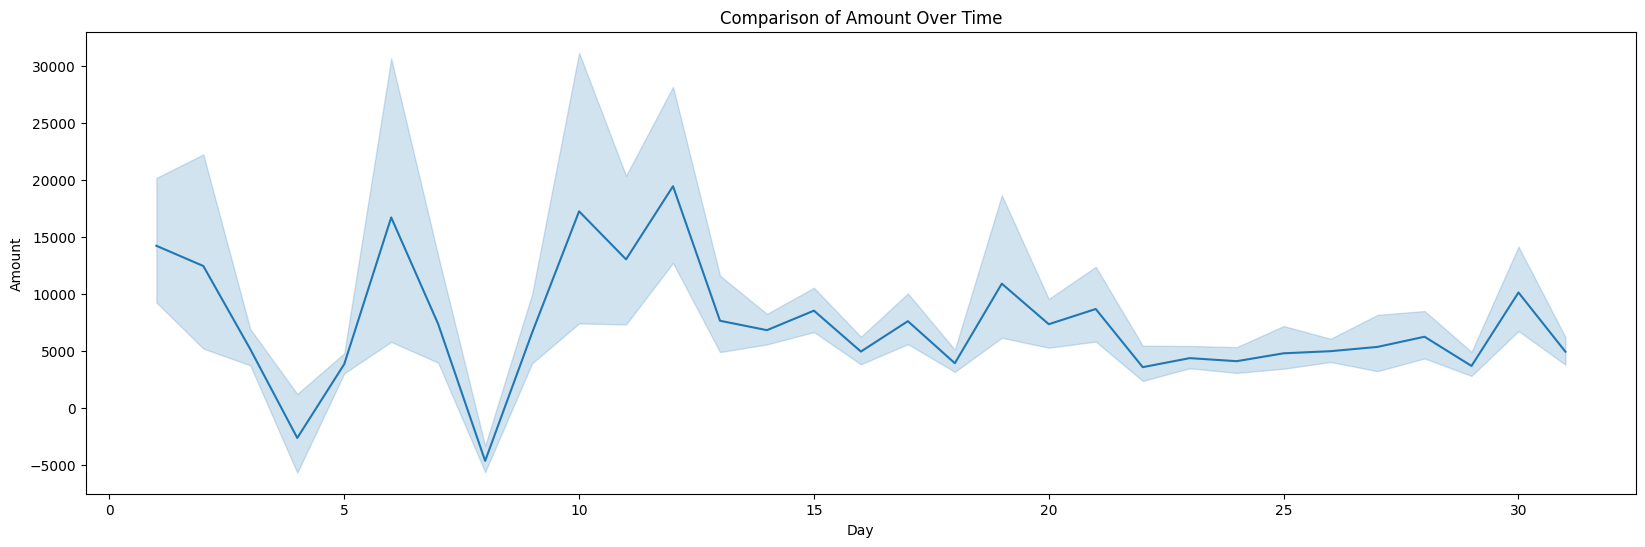

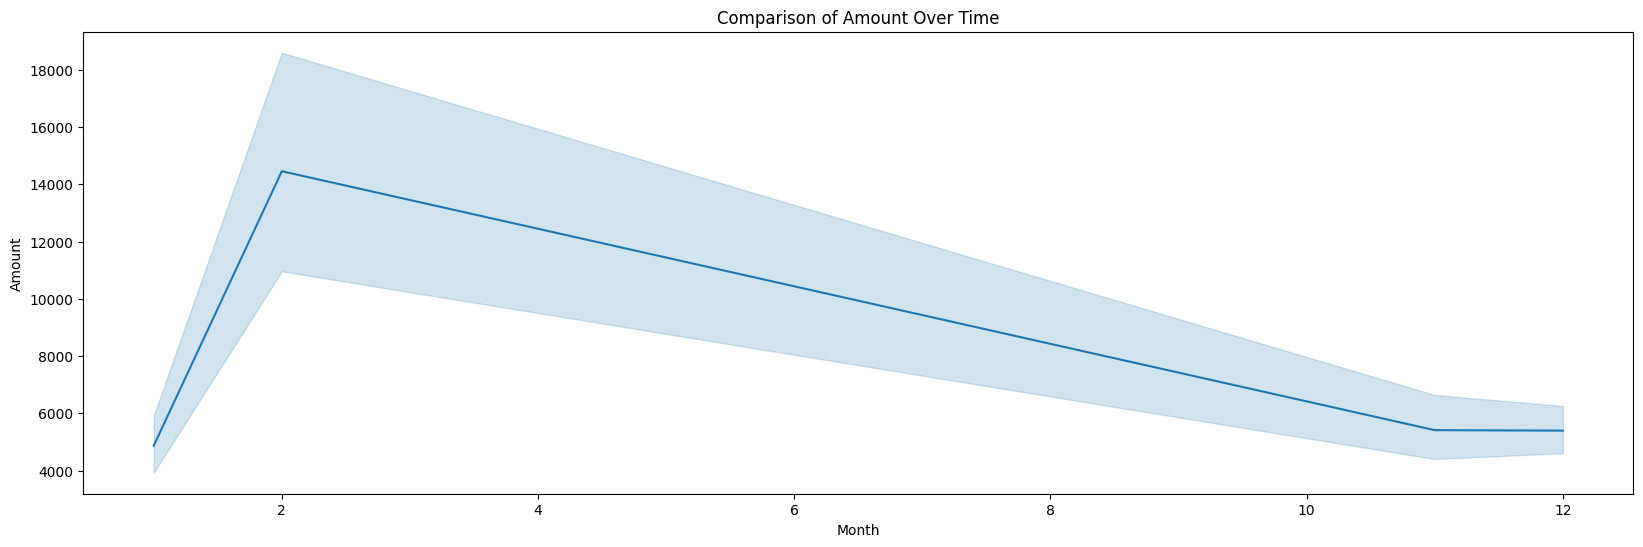

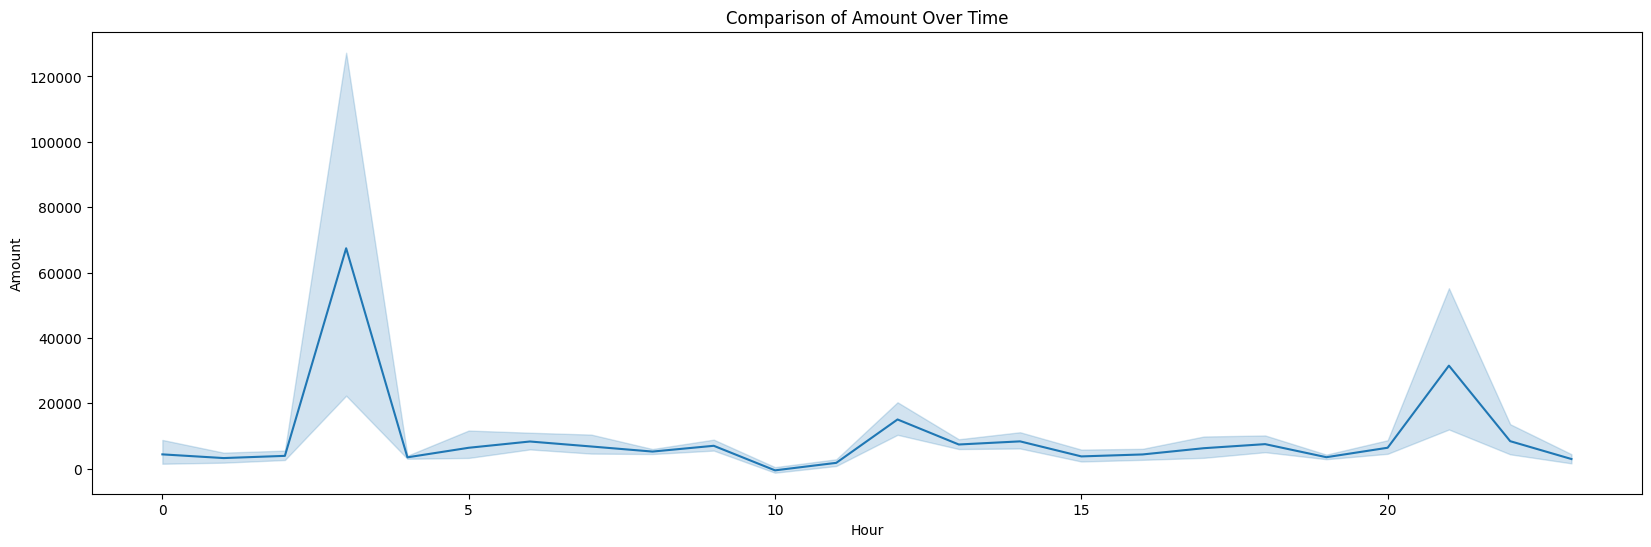

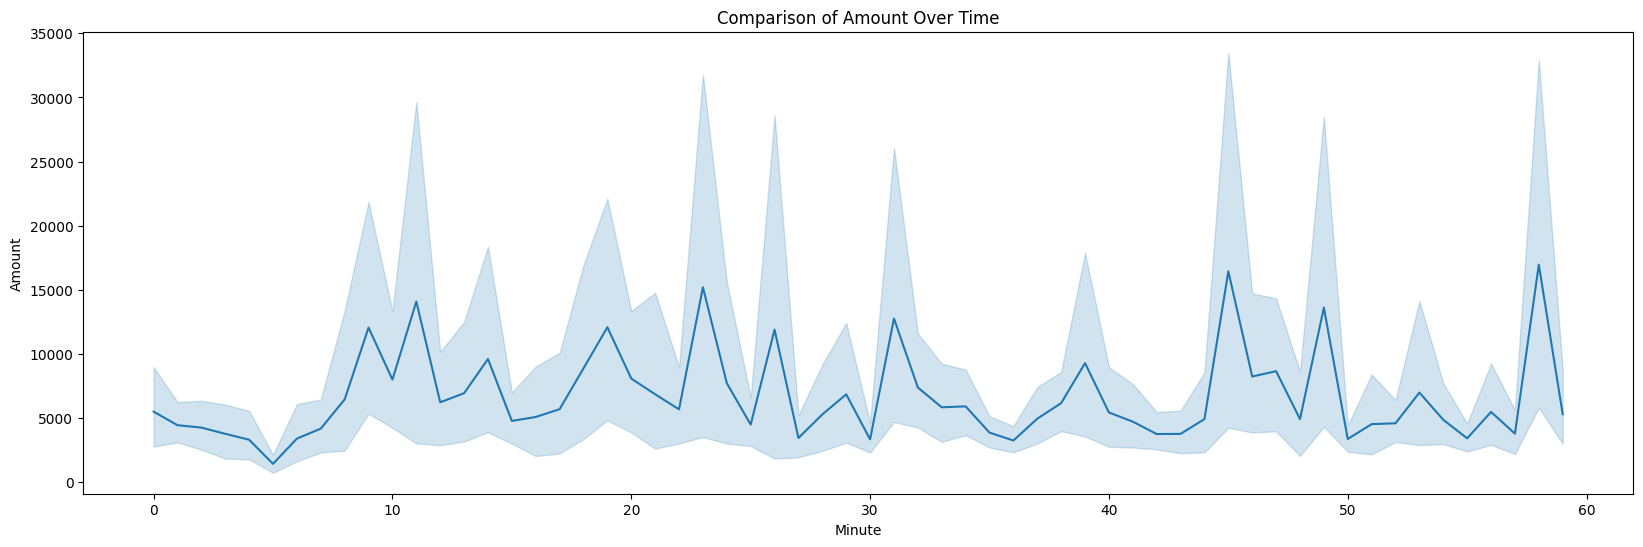

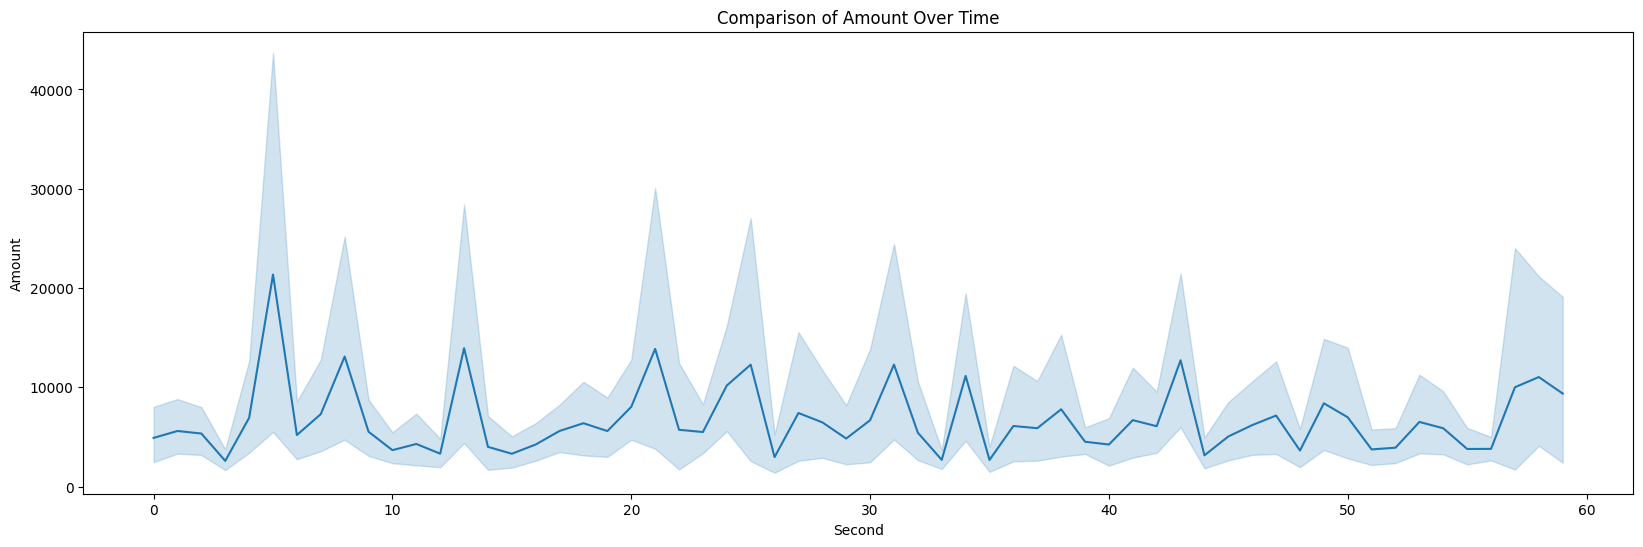

In [30]:
# Plotting violin plots for selected features
for feature in selected_features:
    visualizer.plot_line(credit_df, feature, 'Amount')

#### Correlation analysis

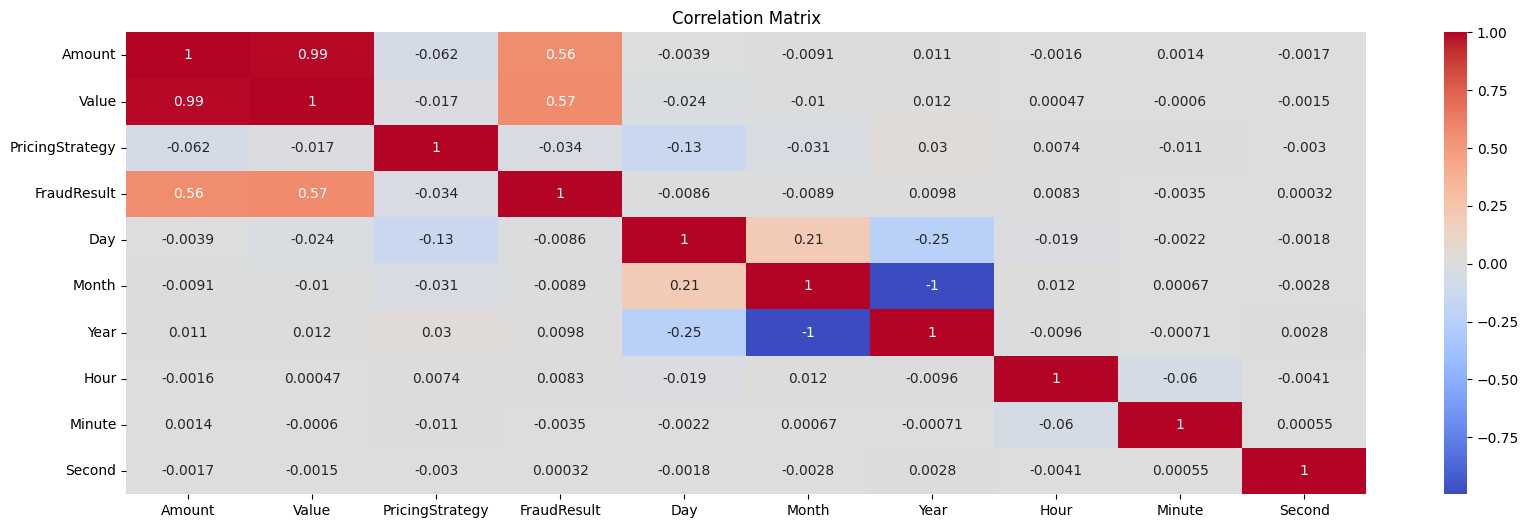

In [26]:
num_col.drop('CountryCode', axis=1, inplace=True)
visualizer.correlation_matrix(num_col)

# Reference
[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

[Matplotlib Documentation](https://matplotlib.org/stable/tutorials/index.html)

[Seaborn Documentation](https://seaborn.pydata.org/tutorial.html)

[Exploratory Data Analysis](https://www.epa.gov/caddis/exploratory-data-analysis)